In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [4]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897123

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [5]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))


0.44553225151184195
0.43804663459144766


In [6]:
#Run the model for many alphas.

#First, Ridge
lam = np.arange(1, 50, 1)
rsquared_ridge = np.array([])
for i in lam:
    ridge_reg = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridge_reg.fit(X_train2, Y_train)
    rsquared_ridge.append(ridge_reg.score(X_train2, Y_train))

#Second, Lasso
rsquared_lasso = np.array([])
for i in lam:
    lasso_reg = linear_model.Lasso(alpha=i)
    lasso_reg.fit(X_train2, Y_train)
    lasso_reg.append(lasso_reg.score(X_train2, Y_train))

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [7]:
#First, Ridge

lam_ridge = np.arange(0, 1000, 5)
rsquared_ridge = pd.DataFrame()
for i in lam_ridge:
    ridge_reg = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridge_reg.fit(X_train2, Y_train)
    rsquared_ridge_tmp = pd.DataFrame({'alpha': i, 'r_squared': ridge_reg.score(X_train2, Y_train)}, index=[0])
    rsquared_ridge = rsquared_ridge.append(rsquared_ridge_tmp)
    
#Second, Lasso
lam_lasso = np.arange(0, 5, 0.01)
rsquared_lasso = pd.DataFrame()
for i in lam_lasso:
    lasso_reg = linear_model.Lasso(alpha=i)
    lasso_reg.fit(X_train2, Y_train)
    rsquared_lasso_tmp = pd.DataFrame({'alpha': i, 'r_squared': lasso_reg.score(X_train2, Y_train)}, index=[0])
    rsquared_lasso = rsquared_lasso.append(rsquared_lasso_tmp)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.865405e-23
  overwrite_a=True).T
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [8]:
rsquared_ridge.head(10)


,alpha,r_squared
0,0,0.573973
0,5,0.573955
0,10,0.573946
0,15,0.573940
0,20,0.573934
0,25,0.573928
0,30,0.573920
0,35,0.573912
0,40,0.573902
0,45,0.573891


In [9]:
rsquared_lasso.head(10)

,alpha,r_squared
0,0.00,0.573944
0,0.01,0.573768
0,0.02,0.573374
0,0.03,0.572752
0,0.04,0.572009
0,0.05,0.571053
0,0.06,0.569885
0,0.07,0.568505
0,0.08,0.566912
0,0.09,0.565107


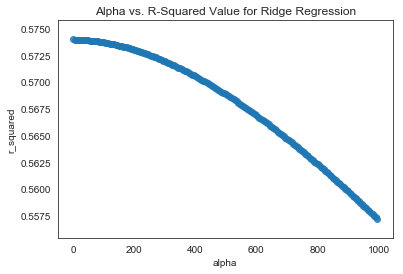

In [12]:
sns.regplot(x="alpha", y="r_squared", data=rsquared_ridge, fit_reg=False)
plt.title('Alpha vs. R-Squared Value for Ridge Regression')
plt.show()

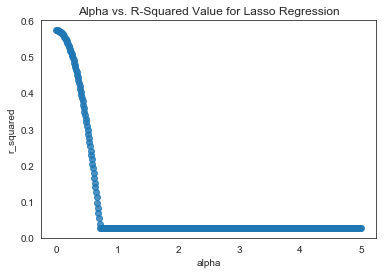

In [13]:
sns.regplot(x="alpha", y="r_squared", data=rsquared_lasso, fit_reg=False)
plt.title('Alpha vs. R-Squared Value for Lasso Regression')
plt.show()